# EDA CUSTOMER ANALYSIS 

In [212]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as s 
%matplotlib inline

In [213]:
customer_data = pd.read_csv('customer_data.csv')

In [214]:
customer_data.describe()

,CustomerID,Age,PurchaseFrequency,RecencyDays,LifetimeSpend,SatisfactionScore,UpgradeInterest
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,34.680900,4.485200,89.370300,258.853333,3.643800,0.558200
std,2886.89568,9.579951,1.961368,88.869671,136.991460,1.056235,0.496626
min,1.00000,18.000000,1.000000,0.000000,28.040000,1.000000,0.000000
25%,2500.75000,28.000000,3.000000,26.000000,160.767500,3.000000,0.000000
50%,5000.50000,34.000000,4.000000,63.000000,241.045000,4.000000,1.000000
75%,7500.25000,41.000000,6.000000,124.000000,337.352500,4.000000,1.000000
max,10000.00000,65.000000,12.000000,874.000000,1087.150000,5.000000,1.000000


In [215]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Gender             10000 non-null  object 
 3   Region             10000 non-null  object 
 4   IncomeLevel        10000 non-null  object 
 5   PurchaseFrequency  10000 non-null  int64  
 6   RecencyDays        10000 non-null  int64  
 7   LifetimeSpend      10000 non-null  float64
 8   SatisfactionScore  10000 non-null  int64  
 9   UpgradeInterest    10000 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 781.4+ KB


In [216]:
## Identifying null values 
pd.isnull(customer_data).sum()

CustomerID           0
Age                  0
Gender               0
Region               0
IncomeLevel          0
PurchaseFrequency    0
RecencyDays          0
LifetimeSpend        0
SatisfactionScore    0
UpgradeInterest      0
dtype: int64

In [217]:
customer_data['CustomerID'].nunique()

10000

In [218]:
## Purchase Frequency Analysis 
customer_data['PurchaseFrequency'].describe()

count    10000.000000
mean         4.485200
std          1.961368
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         12.000000
Name: PurchaseFrequency, dtype: float64

In [219]:
# Lifetimespend Analysis 
customer_data['LifetimeSpend'].describe()

count    10000.000000
mean       258.853333
std        136.991460
min         28.040000
25%        160.767500
50%        241.045000
75%        337.352500
max       1087.150000
Name: LifetimeSpend, dtype: float64

In [220]:
customer_data.groupby('Gender')[['PurchaseFrequency', 'LifetimeSpend','SatisfactionScore']].mean()

,PurchaseFrequency,LifetimeSpend,SatisfactionScore
Gender,,,
Female,4.505116,259.781584,3.648564
Male,4.464620,257.894128,3.638878


In [221]:
## Identifying corr
corr = customer_data.corr(numeric_only=True)
corr

,CustomerID,Age,PurchaseFrequency,RecencyDays,LifetimeSpend,SatisfactionScore,UpgradeInterest
CustomerID,1.000000,-0.008777,-0.011390,0.003939,-0.000868,-0.005250,0.006733
Age,-0.008777,1.000000,-0.004033,-0.009284,0.002379,-0.000164,0.000614
PurchaseFrequency,-0.011390,-0.004033,1.000000,-0.011161,0.826730,0.667128,0.492892
RecencyDays,0.003939,-0.009284,-0.011161,1.000000,-0.012956,-0.004872,-0.350256
LifetimeSpend,-0.000868,0.002379,0.826730,-0.012956,1.000000,0.720398,0.527813
SatisfactionScore,-0.005250,-0.000164,0.667128,-0.004872,0.720398,1.000000,0.707969
UpgradeInterest,0.006733,0.000614,0.492892,-0.350256,0.527813,0.707969,1.000000


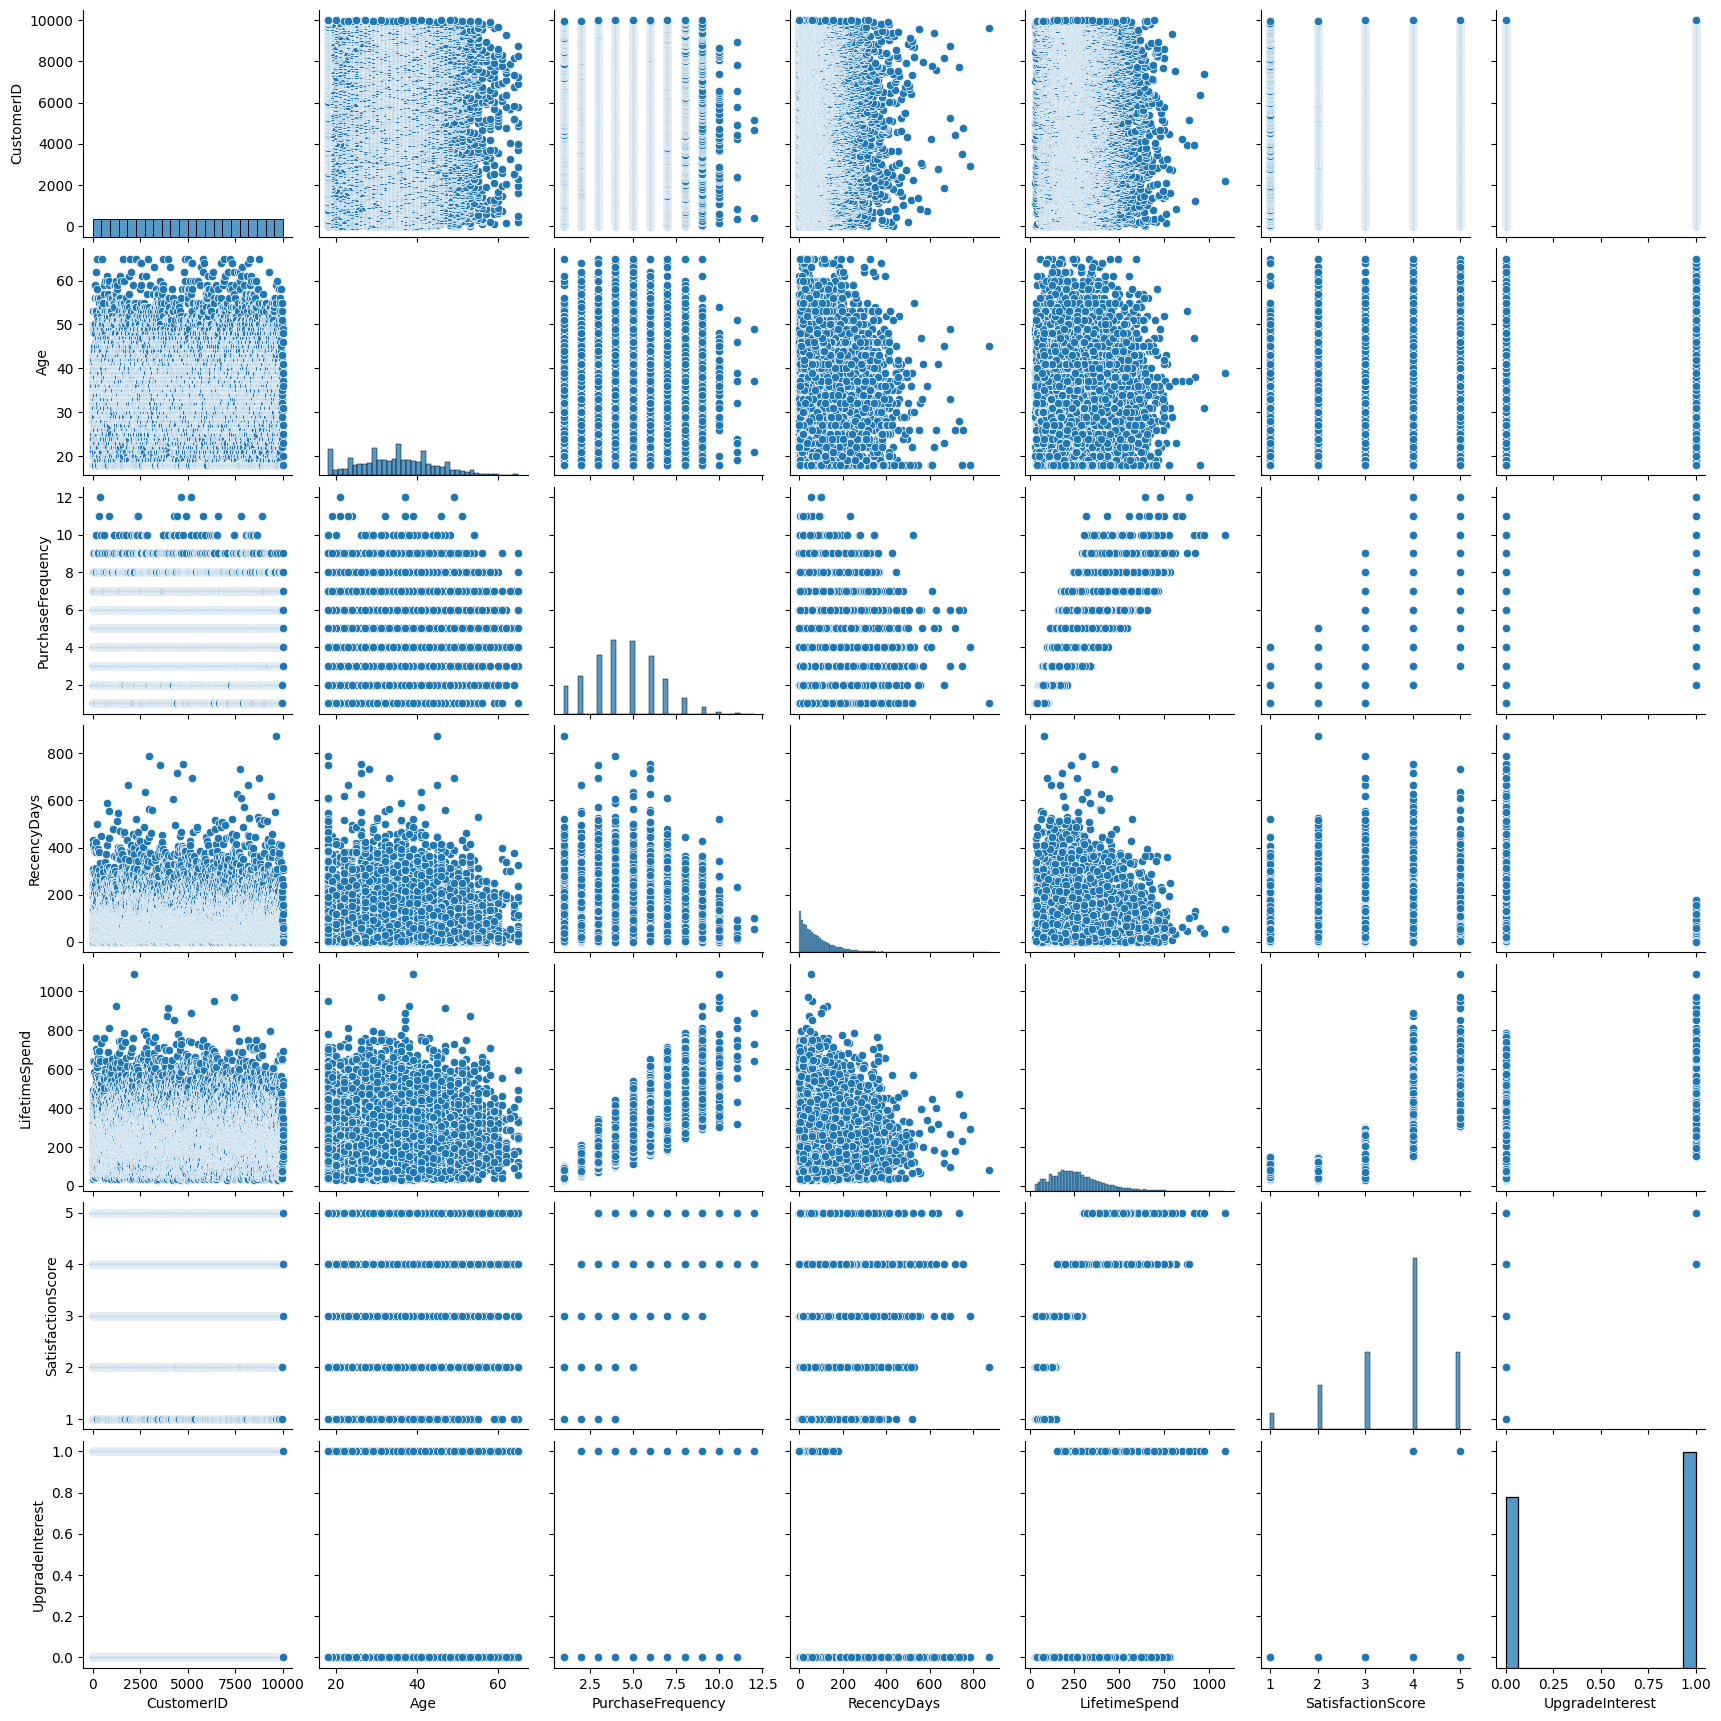

In [222]:
s.pairplot(customer_data)

In [234]:
df_encoded = pd.get_dummies(customer_data, columns=['Gender', 'Region', 'IncomeLevel'], drop_first=True)

## Identifying corr
corr = df_encoded.corr(numeric_only=True)
corr

,CustomerID,Age,PurchaseFrequency,RecencyDays,LifetimeSpend,SatisfactionScore,UpgradeInterest,Gender_Male,Region_Eastern Europe,Region_Northern Europe,Region_Southern Europe,Region_Western Europe,IncomeLevel_Low,IncomeLevel_Medium
CustomerID,1.000000,-0.008777,-0.011390,0.003939,-0.000868,-0.005250,0.006733,-0.011753,-0.019349,0.011855,0.006691,0.004538,-0.002068,-0.002792
Age,-0.008777,1.000000,-0.004033,-0.009284,0.002379,-0.000164,0.000614,0.003306,-0.003318,0.014007,-0.017893,0.027967,-0.009493,0.017626
PurchaseFrequency,-0.011390,-0.004033,1.000000,-0.011161,0.826730,0.667128,0.492892,-0.010323,-0.003280,0.009568,-0.011129,0.005631,-0.003688,-0.000822
RecencyDays,0.003939,-0.009284,-0.011161,1.000000,-0.012956,-0.004872,-0.350256,-0.000538,0.011025,0.013681,-0.020372,-0.003818,0.003889,-0.017354
LifetimeSpend,-0.000868,0.002379,0.826730,-0.012956,1.000000,0.720398,0.527813,-0.006888,-0.010433,0.005064,-0.010744,0.010990,-0.384991,0.071772
SatisfactionScore,-0.005250,-0.000164,0.667128,-0.004872,0.720398,1.000000,0.707969,-0.004585,-0.006466,0.015855,-0.010258,0.003090,-0.304378,0.115051
UpgradeInterest,0.006733,0.000614,0.492892,-0.350256,0.527813,0.707969,1.000000,-0.006939,-0.013697,0.013598,-0.000072,0.002774,-0.220455,0.092321
Gender_Male,-0.011753,0.003306,-0.010323,-0.000538,-0.006888,-0.004585,-0.006939,1.000000,-0.002147,0.008687,0.011927,-0.002097,-0.001071,0.009188
Region_Eastern Europe,-0.019349,-0.003318,-0.003280,0.011025,-0.010433,-0.006466,-0.013697,-0.002147,1.000000,-0.244016,-0.251627,-0.247431,0.011878,-0.008042
Region_Northern Europe,0.011855,0.014007,0.009568,0.013681,0.005064,0.015855,0.013598,0.008687,-0.244016,1.000000,-0.240471,-0.236462,0.004257,-0.001912


# CLUSTERING IMPLEMENTATION 

In [224]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)


In [225]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method
inertia = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

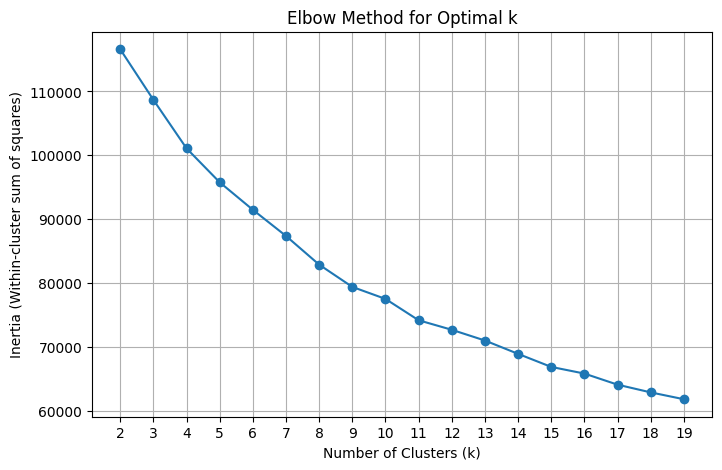

In [226]:
plt.figure(figsize=(8, 5))
plt.plot(range(2,20), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True)
plt.xticks(range(2,20))
plt.show()


In [227]:
!pip install kneed


In [228]:
from kneed import KneeLocator
knee = KneeLocator(range(2,20), inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee
print(f"Optimal number of clusters according to the Elbow (Knee) method: {optimal_k}")

Optimal number of clusters according to the Elbow (Knee) method: 11


In [229]:
kmeans = KMeans(n_clusters=2, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(scaled_features)

In [230]:
cluster_summary = df_encoded.groupby('Cluster').mean()
cluster_summary

,CustomerID,Age,PurchaseFrequency,RecencyDays,LifetimeSpend,SatisfactionScore,UpgradeInterest,Gender_Male,Region_Eastern Europe,Region_Northern Europe,Region_Southern Europe,Region_Western Europe,IncomeLevel_Low,IncomeLevel_Medium
Cluster,,,,,,,,,,,,,,
0,5004.605622,34.727711,5.416500,75.662009,329.177244,4.332834,0.928476,0.488024,0.202262,0.194278,0.195442,0.193280,0.204424,0.545742
1,4994.310682,34.610331,3.081244,110.035858,152.838450,2.605065,0.000000,0.497492,0.205115,0.181294,0.203611,0.193581,0.457372,0.430040


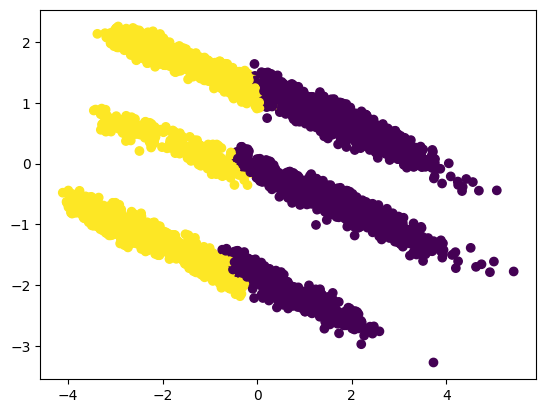

In [231]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_encoded['Cluster'])


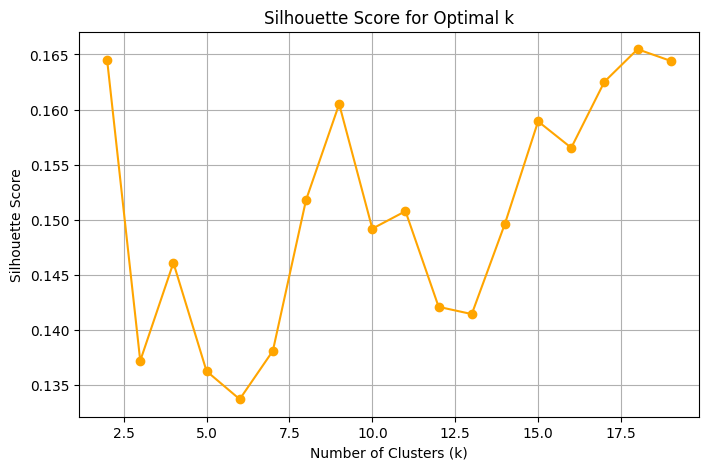

In [232]:
silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()


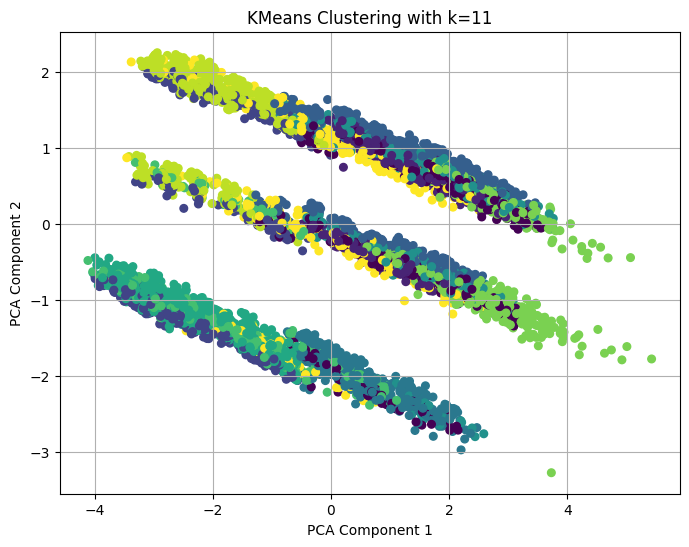

In [233]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='viridis', s=30)
plt.title(f'KMeans Clustering with k={optimal_k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()
